In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import seaborn as sns
import numpy as np
import plotly.express as px

In [17]:
# Loading the cleaned Datasets
US_data = pd.read_csv('/Users/mahnooriqbal/COMP702 Project/ML-AI-Risk-Analysis-AV-Data-/US-cleaned_data.csv')
US_data.head()


,Report ID,Report Version,Make,Model,Model Year,ADS Equipped?,Automation System Engaged?,Incident Date,Incident Time (24:00),City,...,Roadway Type,Roadway Surface,Posted Speed Limit (MPH),Lighting,Crash With,Highest Injury Severity Alleged,SV Pre-Crash Movement,Weather,SV Contact Area,Country
0,10003-2800,4,International,LT,2022-01-01,No,"Unknown, see Narrative",2025-11-21,19:57:00,Maxatawny Tounship,...,Street,Dry,25.0,Dark - Not Lighted,Other Fixed Object,Unknown,Proceeding Straight,Missing,Front,US
1,10003-2932,1,International,LT,2022-01-01,Yes,"Unknown, see Narrative",2021-11-04,19:57:00,Maxatawny Township,...,Street,Dry,25.0,Dark - Not Lighted,Other Fixed Object,Unknown,Proceeding Straight,Missing,Front,US
2,10003-3210,1,International,LT625,2021-01-01,Yes,"Unknown, see Narrative",2022-04-04,15:52:00,Tucson,...,Highway / Freeway,Dry,65.0,Daylight,Other Fixed Object,No Injuries Reported,Proceeding Straight,Clear,Front Left,US
3,10003-4179,1,International,LT,2022-01-01,No,ADAS,2025-10-22,15:09:00,Missing,...,Highway / Freeway,Dry,65.0,Daylight,Passenger Car,Unknown,Proceeding Straight,Clear,Front Left,US
4,10003-6050,2,International,LT625,2022-01-01,No,"Unknown, see Narrative",2025-12-22,08:20:00,Natural Bridge,...,Highway / Freeway,Dry,70.0,Daylight,Other Fixed Object,No Injuries Reported,Proceeding Straight,Clear,"Rear Left, Left, Front Left, Front, Rear Right...",US


In [18]:
# Loading the cleaned Datasets
UK_data = pd.read_csv('/Users/mahnooriqbal/COMP702 Project/ML-AI-Risk-Analysis-AV-Data-/UK-cleaned_data.csv')
UK_data.head()


,Report ID,Report Version,Highest Injury Severity Alleged,Incident Date,Incident Time (24:00),Roadway Type,Posted Speed Limit (MPH),Lighting,Weather,Roadway Surface,...,Crash With,SV Contact Area,City,State,Country,Make,Model,Model Year,ADS Equipped?,Automation System Engaged?
0,2019010155206,10155206,Slight,2019-01-01,01:15:00,Single carriageway,30.0,Darkness - lights lit,Fine no high winds,Dry,...,NaN,Front,Chadwell Heath,Greater London,United Kingdom,SUZUKI,SWIFT,2015.0,Conventional,Conventional
1,2019010155217,10155217,Serious,2019-01-01,04:10:00,Dual carriageway,40.0,Darkness - lights lit,Fine no high winds,Dry,...,Other object,Front,Ilford,Greater London,United Kingdom,HYUNDAI,I30,2015.0,Conventional,Conventional
2,2019010155425,10155425,Slight,2019-01-02,15:07:00,Single carriageway,20.0,Daylight,Fine no high winds,Dry,...,NaN,Front,Stamford Hill,Greater London,United Kingdom,MERCEDES,C CLASS,2018.0,Conventional,Conventional
3,2019010156538,10156538,Slight,2019-01-08,21:20:00,Single carriageway,20.0,Darkness - lights lit,Fine no high winds,Dry,...,NaN,Front,Goodmayes,Greater London,United Kingdom,TOYOTA,AVENSIS,2005.0,Conventional,Conventional
4,2019010156721,10156721,Serious,2019-01-10,08:20:00,Dual carriageway,30.0,Daylight,Fine no high winds,Dry,...,NaN,Front,South Norwood,Greater London,United Kingdom,AUDI,A4,2017.0,Conventional,Conventional


In [19]:
# Printing all columns for both datasets
print("Columns in UK_data:")
print(UK_data.columns)

print("\nColumns in US_data:")
print(US_data.columns)

# Checking if both datasets have the same number of rows and columns
print("\nNumber of columns in UK_data:", UK_data.shape[1])
print("Number of columns in US_data:", US_data.shape[1])


Columns in UK_data:
Index(['Report ID', 'Report Version', 'Highest Injury Severity Alleged',
       'Incident Date', 'Incident Time (24:00)', 'Roadway Type',
       'Posted Speed Limit (MPH)', 'Lighting', 'Weather', 'Roadway Surface',
       'SV Pre-Crash Movement', 'Crash With', 'SV Contact Area', 'City',
       'State', 'Country', 'Make', 'Model', 'Model Year', 'ADS Equipped?',
       'Automation System Engaged?'],
      dtype='object')

Columns in US_data:
Index(['Report ID', 'Report Version', 'Make', 'Model', 'Model Year',
       'ADS Equipped?', 'Automation System Engaged?', 'Incident Date',
       'Incident Time (24:00)', 'City', 'State', 'Roadway Type',
       'Roadway Surface', 'Posted Speed Limit (MPH)', 'Lighting', 'Crash With',
       'Highest Injury Severity Alleged', 'SV Pre-Crash Movement', 'Weather',
       'SV Contact Area', 'Country'],
      dtype='object')

Number of columns in UK_data: 21
Number of columns in US_data: 21


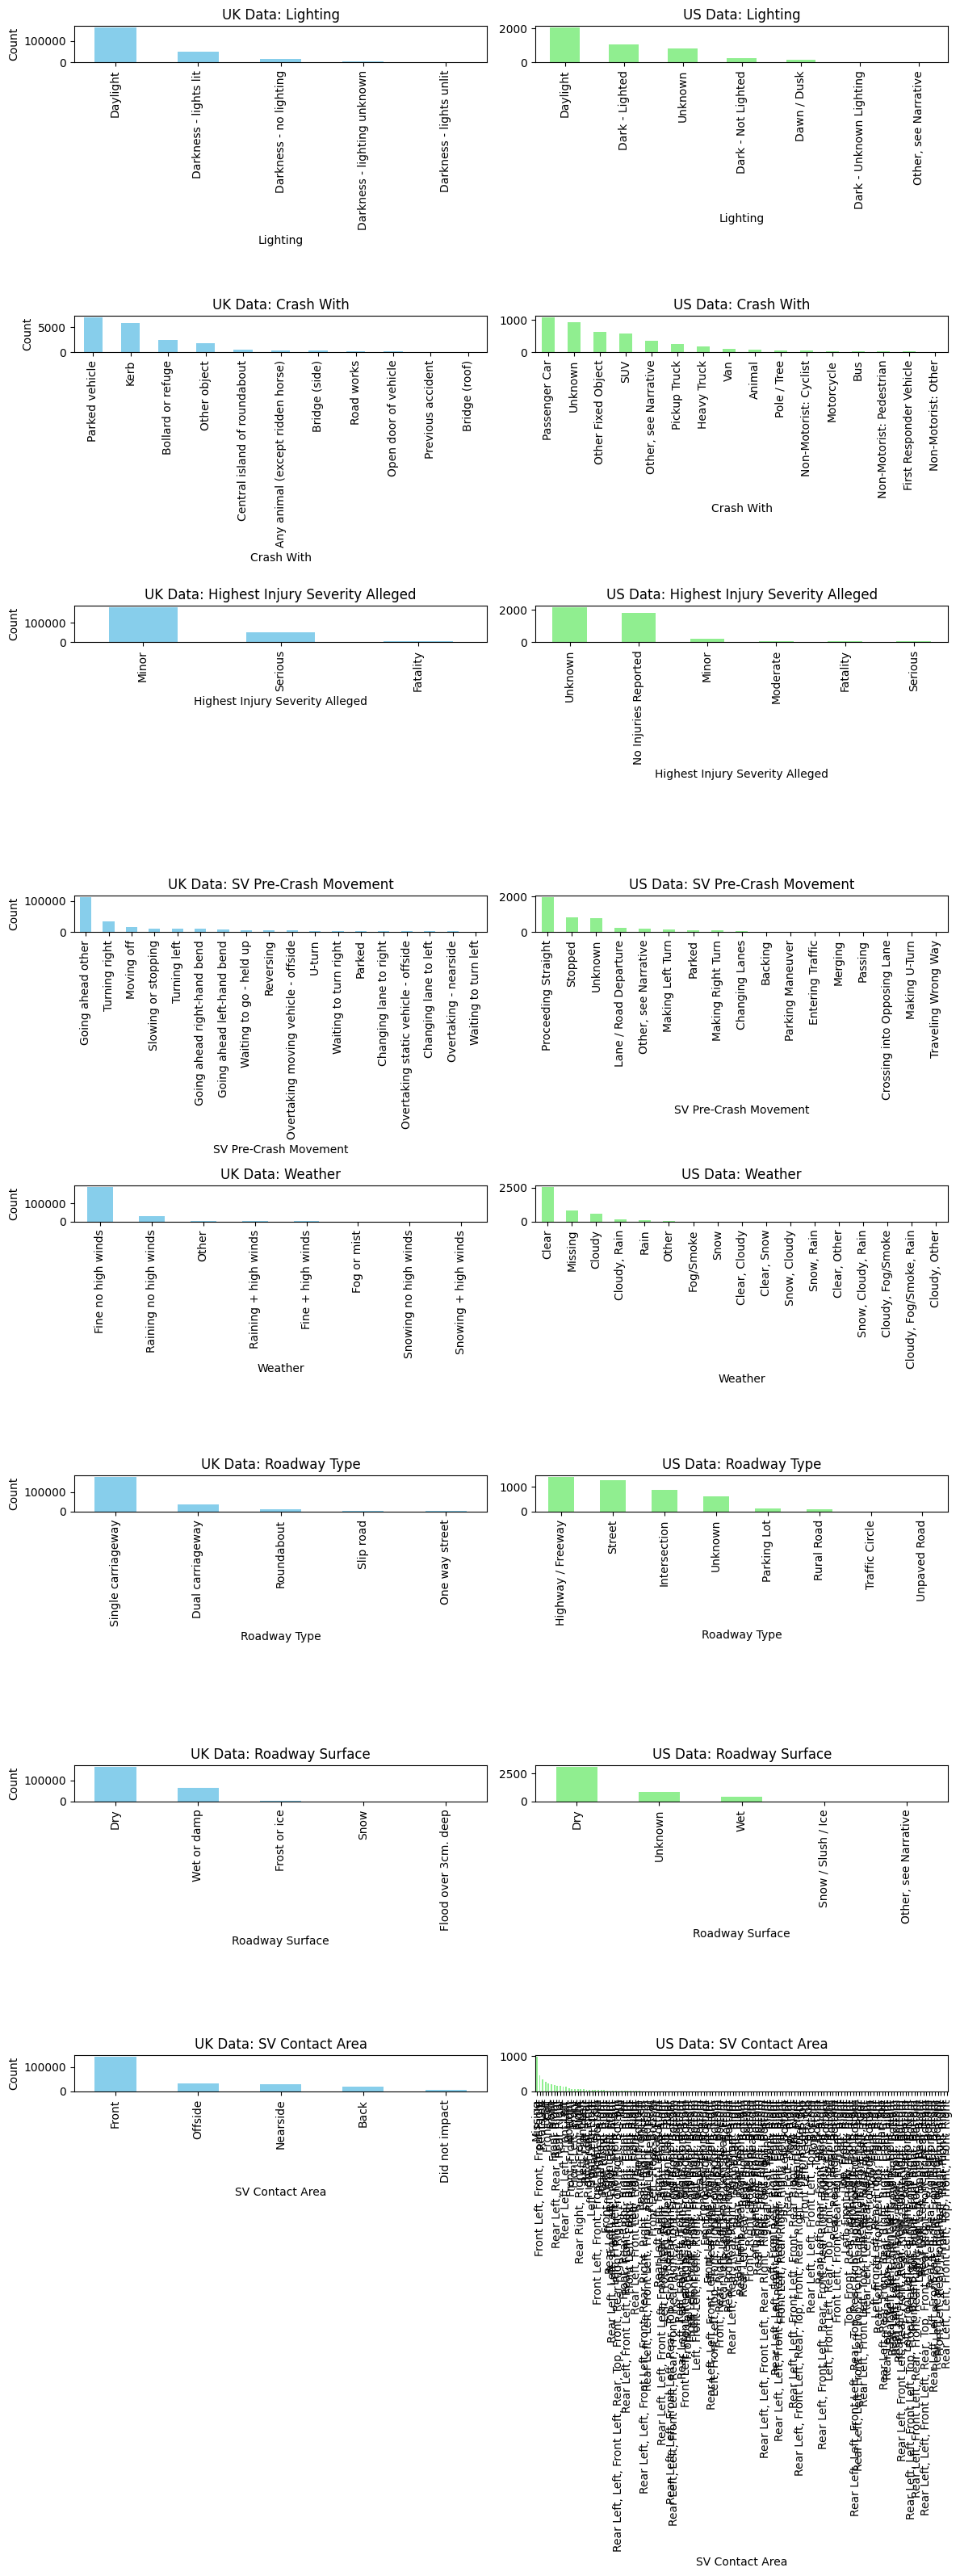

In [24]:
# Columns to plot
columns_to_plot = [
    'Lighting', 'Crash With', 'Highest Injury Severity Alleged', 
    'SV Pre-Crash Movement', 'Weather', 'Roadway Type', 
    'Roadway Surface', 'SV Contact Area'
]

# Create subplots
fig, axes = plt.subplots(len(columns_to_plot), 2, figsize=(12, len(columns_to_plot) * 4), sharey=False)

for idx, column in enumerate(columns_to_plot):
    # UK_data bar chart
    UK_data[column].value_counts().plot(kind='bar', ax=axes[idx, 0], color='skyblue')
    axes[idx, 0].set_title(f'UK Data: {column}')
    axes[idx, 0].set_xlabel(column)
    axes[idx, 0].set_ylabel('Count')

    # US_data bar chart
    US_data[column].value_counts().plot(kind='bar', ax=axes[idx, 1], color='lightgreen')
    axes[idx, 1].set_title(f'US Data: {column}')
    axes[idx, 1].set_xlabel(column)

plt.tight_layout()
plt.show()

In [23]:

# Renaming values in the "Highest Injury Severity Alleged" column of UK_data
UK_data['Highest Injury Severity Alleged'] = UK_data['Highest Injury Severity Alleged'].replace({
    'Fatal': 'Fatality',
    'Slight': 'Minor'
})


UK_data['Weather'] = UK_data['Weather'].replace({
    'Wet or damp': 'Wet',
    'Frost or ice': 'Snow / Slush / Ice',
    'Snow': 'Snow / Slush / Ice'
})